# GEOS 505: Problem Set 2

This problem set assesses some foundational abilities to create graphics that are appropriate to presentations and publications (broadly defined to be inclusive of technical reports, theses, etc.), using a combination of `NumPy` and `Matplotlib`.

__Instructions__: Complete the two problems below, which consist of creating publication-ready figures. Where you are asked to provide descriptive text and answer questions, please do so via well formatted Markdown cells below the problem. You are strongly encouraged to use both `Numpy` and `Matplotlib` documentation in developing your plots. Use of LLMs is accepted, but verify LLM-supplied code by consulting the documentation.

__Due Date and Time__: October 10, 2025 at 5:00 PM MT

__Turn In Via__: Commit and push your complete notebook to your personal GitHub repository for the class, and submit the URL for notebook via Canvas. 

## Setup

As part of your thesis, you are examining the potential influence of forest fires in the Upper Boise River Basin (UBRB) on hydrologic processes including snow accumulation/melt, soil moisture, and streamflow. You decide to start out by examining streamflow and want to get a sense of how much streamflow varies across two years, separated by 30 years. As such, you decide to examine streamflow from Water Years 1987 and 2017 (although you know the latter is a large snow year). __Instructions:__ Run the code cell below, altering only which gage you will use (choose 0-3, corresponding to the commented descriptions of the gages).

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataretrieval import nwis

## Set parameters needed to retrieve data
startDate1 = '2016-10-01' # Water Year 2017
endDate1 = '2017-09-30'
startDate2 = '1986-10-01' # Water Year 1987
endDate2 = '1987-09-30'
parameterCode = '00060'

## Choose one of the following:
gages = ['13200000', # Mores Creek Above Robie Creek
         '13185000', # Boise River Near Twin Springs
         '13186000', # SF Boise River near Featherville 
         '13192200'  # SF Boise Near Arrowrock Dam
         ]

my_gage = gages[2] # Choose 0-3
gage_name = 'SF Boise River near Featherville'

## Getting the Data

The function below takes as input the USGS gage ID (as a string, should be 8 digits), the start date, and the end date. It uses this information to query the USGS National Water Information System (NWIS) API to fetch the data that corresponds to the data request. It passes the fetched data back as a simplified `Pandas` dataframe containing only the date (as a `datetime` object) and the streamflow (in ft${}^3$/s). __Instructions:__ Run the cell below without modification. 

In [51]:
def GetStreamFlowData(gage, startDate, endDate, parameterCode):
    
    dailyStreamflow = nwis.get_dv(sites=gage, parameterCd=parameterCode, start=startDate, end=endDate)
    print('Retrieved ' + str(len(dailyStreamflow[0])) + ' data values for gage ' + gage)
    dt_output = dailyStreamflow[0].index
    q_output = dailyStreamflow[0]['00060_Mean'].values
    
    output_data = {
        'date': dt_output.strftime('%Y-%m-%d'),
        'q_cfs': q_output
    }
    
    df_out = pd.DataFrame(output_data)
    
    return df_out
    

## The Data and Analysis

The code below calls the `GetStreamFlowData(...)` function from above with the appropriate gage ID, start and end dates, and parameter code (`00060` for discharge/streamflow) and collects the data as a `Pandas` dataframe. __Instructions:__ Verify that the correct parameters are being supplied and run the code below.

In [52]:
wy1_streamflow = GetStreamFlowData(my_gage, startDate1, endDate1, parameterCode)
wy2_streamflow = GetStreamFlowData(my_gage, startDate2, endDate2, parameterCode)

Retrieved 365 data values for gage 13186000
Retrieved 365 data values for gage 13186000


## Instructions

Although you are towards the beginning of your research, you do need to demonstrate research progress. Your advisor has encouraged you to prepare a PowerPoint presentation the Pacific Northwest Water Summit in early November, and prepare some figures appropriate for a thesis proposal in the spring. As such, you need to efficiently create identical figures that are appropriate to both presentation and print formats. A manageable task that you can do by November is to plot both the empirical frequency distribution function (the histogram in frequency space) of the two years of streamflow data, as well as the associated cumulative density function (CDF). Your advisor agrees this is reasonable, but also wants you to highlight the mean of each year on the frequency distribution and the median flow, 5% non-exceedance, and 95% non-exceedance flows on the CDF. With this established you need a plan. __Your completed notebook should show 4 plots.__

#### Figure 1: Probability Density Plot

Compute the histograms of the daily streamflow data for each water year. We want to prepare a plot in which the frequency distributions share the same x-axis, so you'll need to do some sleuthing to figure out how you should use `np.histogram()`. You do some brainstorming and decide the plot should:

- Have all axes labelled, including units in SI format
- Have font sets and sizes that are appropriate to either a PowerPoint presentation or a print document
- Indicate the mean of each water year with a vertical line
- Use colors that are color-blind friendly
- Use gridlines appropriately
- Have a meaningful legend
- Save in a format like PNG

#### Figure 2: Cumulative Density Function Plot

With the histograms completed from above, you should now be able to calculate the CDF in a straightforward manner (you remember that the CDF is just the integral of the PDF from Probability and Statistics). So you come up with the requirements of the CDF plot, which are only slightly different than the PDF/histogram plot. You decide the plot should: 

- Have all axes labelled, including units in SI format
- Have font sets and sizes that are appropriate to either a PowerPoint presentation or a print document
- Indicate the median, 5%, and 95% non-exceedance values using both horizontal and vertical lines. Maybe do something fancy like intersect directly at the CDF. 
- Use colors that are color-blind friendly
- Use gridlines appropriately
- Have a meaningful legend
- Save in a format like PNG

At the very end of your 30-minute weekly advising check-in, your advisor closed their eyes, rubbed their temples intently, and spouted off the following `NumPy` and `Matplotlib` commands that should be helpful. 

In [ ]:
np.cumsum() # Or x.cumsum(), where x is a vector of data
np.percentile() 
np.histogram() 
# Note: When using np.histogram(), make sure to use the same bins for both data records.
# Consider using min(), max(), and linspace() to create custom bins.


plt.hlines()
plt.vlines()

In [53]:
# convert streamflow to SI units (cms)
wy1_streamflow['q_cms'] = wy1_streamflow['q_cfs'] * 0.0283168
wy2_streamflow['q_cms'] = wy2_streamflow['q_cfs'] * 0.0283168

In [54]:

mean1 = np.mean(wy1_streamflow['q_cms'])
mean2 = np.mean(wy2_streamflow['q_cms'])

median1 = np.median(wy1_streamflow['q_cms'])
median2 = np.median(wy2_streamflow['q_cms'])

non_exceed951 = np.percentile(wy1_streamflow['q_cms'], 95)
non_exceed952 = np.percentile(wy2_streamflow['q_cms'], 95)

non_exceed51 = np.percentile(wy1_streamflow['q_cms'], 5)
non_exceed52 = np.percentile(wy2_streamflow['q_cms'], 5)

max1 = np.max(wy1_streamflow['q_cms'])
max2 = np.max(wy2_streamflow['q_cms'])  

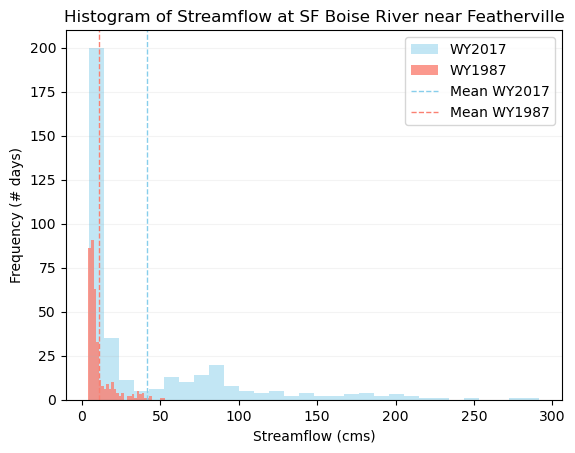

In [72]:
# make a histogram with both 
plt.hist(wy1_streamflow['q_cms'], bins=30,alpha=0.5, label='WY2017', color='skyblue')
plt.hist(wy2_streamflow['q_cms'], bins=30, alpha=0.8, label='WY1987', color='salmon')
plt.xlabel('Streamflow (cms)')
plt.ylabel('Frequency (# days)')
plt.title(f'Histogram of Streamflow at {gage_name}')
plt.grid(axis='y', alpha=0.15)
#plt.xticks(np.arange(0,max1,max1/7))
# Add vertical lines for the mean streamflow
plt.axvline(mean1, color='skyblue',alpha = 1, linestyle='dashed', linewidth=1, label='Mean WY2017')
plt.axvline(mean2, color='salmon', alpha = 1, linestyle='dashed', linewidth=1, label='Mean WY1987')
plt.legend()
plt.show()

#plt.savefig('DailyStreamflow_hist.png')

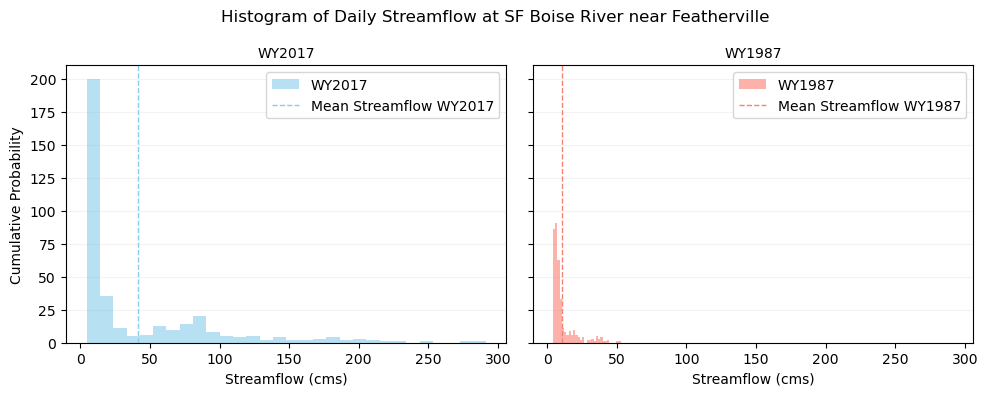

In [60]:
# making two histograms side by side
fig, ax = plt.subplots(1,2,figsize=(10,4), sharey=True, sharex=True)
ax[0].hist(wy1_streamflow['q_cms'], bins=30,alpha=0.6, label='WY2017', color='skyblue')
ax[1].hist(wy2_streamflow['q_cms'], bins=30, alpha=0.6, label='WY1987', color='salmon')

# Add vertical lines for the mean streamflow
ax[0].axvline(mean1, color='skyblue', alpha = 1, linestyle='dashed', linewidth=1, label='Mean Streamflow WY2017')
ax[1].axvline(mean2, color='salmon', alpha = 1, linestyle='dashed', linewidth=1, label='Mean Streamflow WY1987')

# add labels
ax[0].set_xlabel('Streamflow (cms)')
ax[1].set_xlabel('Streamflow (cms)')
ax[0].set_ylabel('Cumulative Probability')
fig.suptitle(f'Histogram of Daily Streamflow at {gage_name}', fontsize=12)
ax[0].set_title('WY2017', fontsize=10)
ax[1].set_title('WY1987', fontsize=10)

ax[0].grid(axis='y', alpha=0.15)
ax[1].grid(axis='y', alpha=0.15)


ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()  

#plt.savefig('DailyStreamflow_hist_sideby.png')

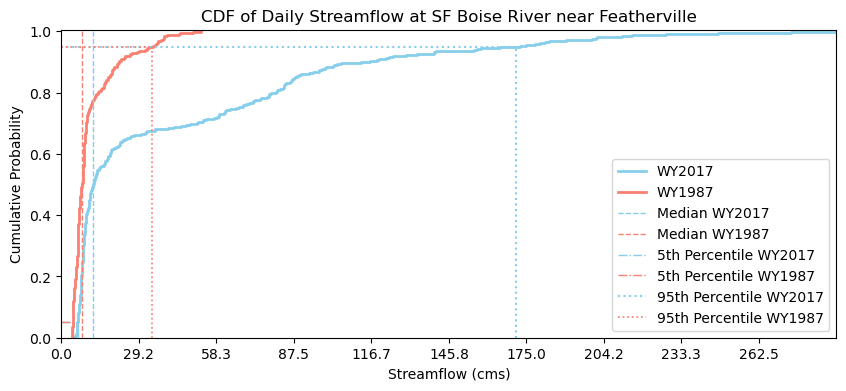

In [59]:
# making a CDF 
plt.figure(figsize=(10,4))
plt.ecdf(wy1_streamflow['q_cms'], label='WY2017', color='skyblue',linewidth=2)
plt.ecdf(wy2_streamflow['q_cms'], label='WY1987', color='salmon',linewidth=2)
# add labels
plt.xlabel('Streamflow (cms)')
plt.ylabel('Cumulative Probability')
plt.title(f'CDF of Daily Streamflow at {gage_name}')
#set limits
plt.xlim(0,np.max([wy1_streamflow['q_cms'], wy2_streamflow['q_cms']]))
plt.ylim(0,1.005)

plt.xticks(np.arange(0,max1,(max1/10)))

# Add vertical lines for the median streamflow
plt.axvline(median1, color='skyblue', alpha = 1, linestyle='dashed', linewidth=1, label='Median WY2017')
plt.axvline(median2, color='salmon', alpha = 1, linestyle='dashed', linewidth=1, label='Median WY1987')

# add vertical and horizontal lines for the 95th and 5th percentiles
# 5th percentile
plt.hlines(0.05, 0, non_exceed51, colors='skyblue', linestyles='-.', linewidth=1)
plt.hlines(0.05, 0, non_exceed52, colors='salmon', linestyles='-.', linewidth=1)
plt.vlines(non_exceed51, 0, 0.05, colors='skyblue', linestyles='-.', linewidth=1, label='5th Percentile WY2017')
plt.vlines(non_exceed52, 0, 0.05, colors='salmon', linestyles='-.', linewidth=1, label='5th Percentile WY1987')
# 95th percentile
plt.hlines(0.95, 0, non_exceed951, colors='skyblue', linestyles=':', linewidth=1.5)
plt.hlines(0.95, 0, non_exceed952, colors='salmon', linestyles=':', linewidth=1.25)
plt.vlines(non_exceed951, 0, 0.95, colors='skyblue', linestyles=':', linewidth=1.5, label='95th Percentile WY2017')
plt.vlines(non_exceed952, 0, 0.95, colors='salmon', linestyles=':', linewidth=1.25, label='95th Percentile WY1987')


plt.legend(loc='lower right')
plt.show()  

#plt.savefig('DailyStreamflow_CDF.png')


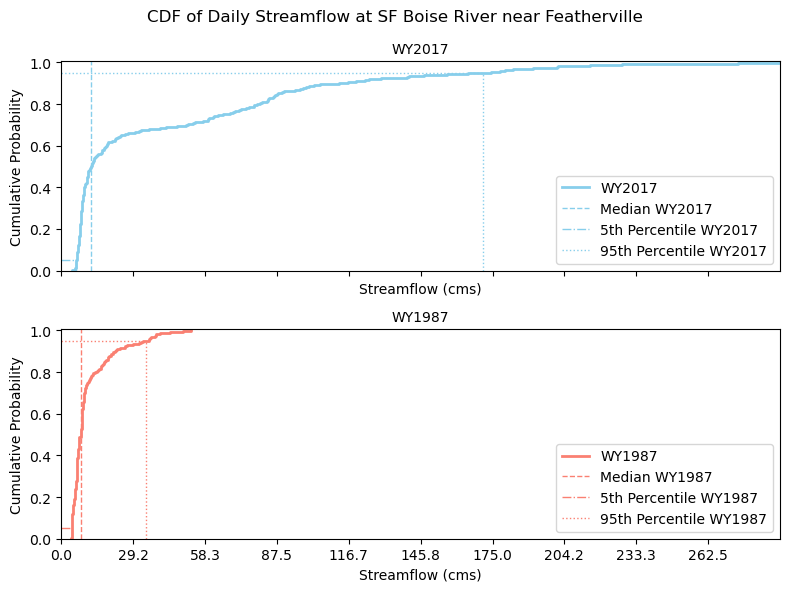

In [64]:
# making two CDFs side by side
fig, ax = plt.subplots(2,1,figsize=(8,6), sharey=True, sharex=True)
ax[0].ecdf(wy1_streamflow['q_cms'], label='WY2017', color='skyblue', linewidth=2)
ax[1].ecdf(wy2_streamflow['q_cms'], label='WY1987', color='salmon', linewidth=2)

ax[0].set_ylim(0,1.005)
ax[1].set_ylim(0,1.005)

ax[0].set_xlim(0,max1)
ax[1].set_xlim(0,max1)
ax[0].set_xticks(np.arange(0,max1,(max1/10)))
ax[1].set_xticks(np.arange(0,max1,(max1/10)))

# Add vertical lines for the median streamflow
ax[0].axvline(median1, color='skyblue', alpha = 1, linestyle='dashed', linewidth=1, label='Median WY2017')
ax[1].axvline(median2, color='salmon', alpha = 1, linestyle='dashed', linewidth=1, label='Median WY1987')

# add 5th percentile and 95th percentile lines
# 5th percentile
ax[0].hlines(0.05, 0, non_exceed51, colors='skyblue', linestyles='-.', linewidth=1)
ax[0].vlines(non_exceed51, 0, 0.05, colors='skyblue', linestyles='-.', linewidth=1, label='5th Percentile WY2017')
ax[1].hlines(0.05, 0, non_exceed52, colors='salmon', linestyles='-.', linewidth=1)
ax[1].vlines(non_exceed52, 0, 0.05, colors='salmon', linestyles='-.', linewidth=1, label='5th Percentile WY1987')

# 95th percentile
ax[0].hlines(0.95, 0, non_exceed951, colors='skyblue', linestyles=':', linewidth=1)
ax[0].vlines(non_exceed951, 0, 0.95, colors='skyblue', linestyles=':', linewidth=1, label='95th Percentile WY2017')
ax[1].hlines(0.95, 0, non_exceed952, colors='salmon', linestyles=':', linewidth=1)
ax[1].vlines(non_exceed952, 0, 0.95, colors='salmon', linestyles=':', linewidth=1, label='95th Percentile WY1987')

# add labels
ax[0].set_xlabel('Streamflow (cms)')
ax[1].set_xlabel('Streamflow (cms)')
ax[0].set_ylabel('Cumulative Probability')
ax[1].set_ylabel('Cumulative Probability')
fig.suptitle(f'CDF of Daily Streamflow at {gage_name}', fontsize=12)
ax[0].set_title('WY2017', fontsize=10)
ax[1].set_title('WY1987', fontsize=10)
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

#plt.savefig('DailyStreamflow_CDF_sidedby.png')

## Reflection Questions:

1. Your advisor is a scatter-brain and flaky. They tell you to try a different gage, and different years after you show them your beautiful plots. How easy would it be to accomodate their ephemeral requests and what did you do to make it relatively painless?
2. The function `GetStreamFlowData` above looks more broadly useful, in that you can query different gages, and request multiple years of data. In class, we talked a bit about "defensive coding." Looking at the function above, identify 3 different errors a user (you) might make in calling that function and how you might use some defensive programming strategies to protect against those errors.


## Answers

1.  To accomodate the request to change the guage it would be pretty easy. You would just need to change the number of the guage in cell 1 and the gage_name variable. To make sure this can be done, I made sure to use generic variable names and to set graph parameters with variables that will automatically update when the guage change is made.  <br><br>

2.  The function `GetStreamFlowData` is an easy to use and usefull function. Three potential user errors that could be made when calling it are:
    1. Using an incorrect gage ID. Either by misspelling or calling on an non-existent gage
    2. Formatting the start and end dates incorrectly. If the dates are not in YYYY-MM-DD format, the function will not be able to run. 
    3. Using an incorrect parameter code. If the streamflow parameter code "00060" is not used, the data pulled may not be correct. 
    
    To protect against those errors, you can impliment error checks. 
    1. You can check that the gage returns with data
        ```python
            if dailyStreamFlow[0].empty:
                raise ValueError(f'No data returned for gage {gage}. Check gage ID and date range')
        ``` 
    2. You can make check that the imported dates are in the correct format. An easy function you can try to confirm the correct date format is:
        ```python
            import datetime as dt
            def isValidData(date):
                try:
                    dt.strptime(date,'%Y-%m-%d')
                    return True
                except ValueError:
                    return False
    3.  To check the parameter code, you can check that the parameter code is found in the data
    ```python
            if '00060_Mean' not in dailyStreamFlow[0].columns:
                raise KeyError('Expected data was not found.')
    ```
       
    You can also add helpfull, informative, and easy to understand comments to guide users. This will prevent any confusion and allow them to format things correctly. 

            
